# Lab 1

In [2]:
!pip install matplotlib 
!pip install seaborn
!pip install numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler

import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\USUARIO\Desktop\Data Analysis\Ironhack\Labs\customer-analysis-round-2\lab-customer-analysis-round-2\files_for_lab\csv_files\marketing_customer_analysis.csv", )
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


# Lab 2

In [4]:
# Showing the dataframe shape

df.shape

(10910, 26)

In [5]:
# Standardizing header names

df.columns = df.columns.str.lower().str.replace(" ", "_")
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [6]:
# Dividing columns in numerical and categorical

numerical = df.select_dtypes("number")
categorical = df.select_dtypes("object")

display(numerical)
display(categorical)

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [7]:
#Checking NaN's 

df.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [8]:
#Filling numerical NaNs with median values

df = df.fillna(df[["months_since_last_claim", "number_of_open_complaints"]].median())

In [9]:
#dropping "vehicle_type" and "unnamed" columns 

df = df.drop("vehicle_type", axis=1)
df = df.drop("unnamed:_0", axis=1)

In [10]:
#Filling categorical NaNs with "other"

df = df.fillna("other")

In [11]:
#Checking NaN's 

df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
#Creating a column for months

df["months"] = df["effective_to_date"].astype(str).str[5:7]
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,months
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,11
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,11
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,11
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,11
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,11
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,1
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,11


In [13]:
#Filtering to obtain the data of the first quarter

first_quarter = df[df["months"].astype(int) <= 3]
first_quarter

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,months
9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,70961,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,1
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,1
11,GE63585,other,2420.711888,other,Basic,Bachelor,2/7/11,Employed,M,31710,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,1
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,1
23,NQ71171,California,5107.071054,No,Basic,Bachelor,2/2/11,Employed,M,70174,...,0.0,7,Personal Auto,Personal L2,Offer1,Agent,128.900320,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10899,WU60905,California,8610.667489,No,Basic,High School or Below,2/6/11,Unemployed,F,0,...,0.0,9,Corporate Auto,Corporate L1,Offer3,Web,532.800000,SUV,Medsize,1
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,1


# Lab 3

In [14]:
#showing dataframe info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [15]:
#describing the dataframe

df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<Axes: xlabel='response', ylabel='count'>

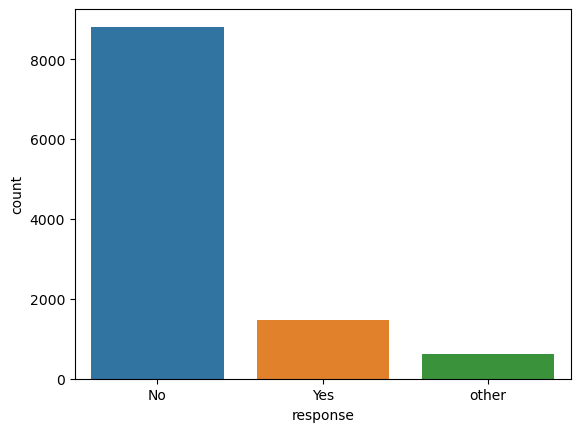

In [16]:
#showing a plot of the total number of responses

sns.countplot(x= "response", data=df)

<Axes: xlabel='response', ylabel='count'>

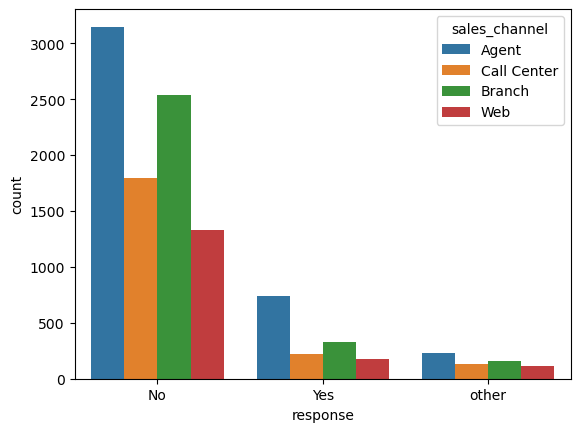

In [17]:
#Showing a plot of the response rate by the sales channel

sns.countplot(data=df, x="response", hue="sales_channel")

<Axes: xlabel='income', ylabel='response'>

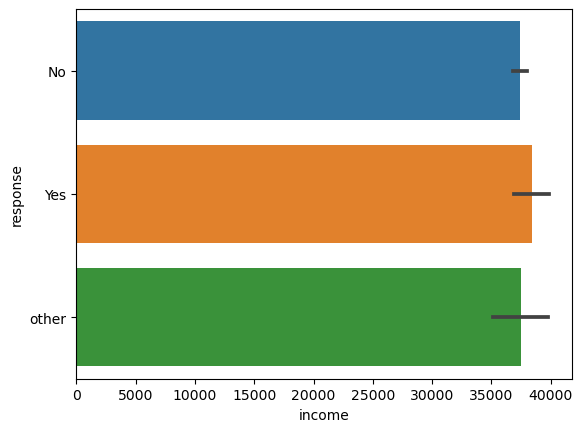

In [18]:
#Showing a plot of the response rate by income

sns.barplot(x='income', y='response', data=df)

<Axes: xlabel='response', ylabel='total_claim_amount'>

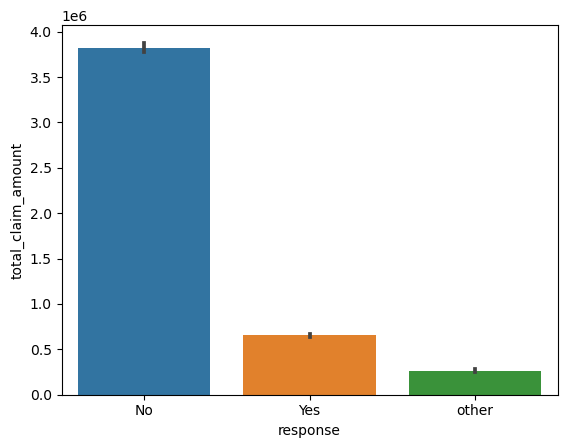

In [19]:
# Showing a plot of the response rate by the total claim amount

sns.barplot(x='response', y='total_claim_amount', data=df, estimator=sum)

# Lab 4 

In [20]:
#Dividing data in categorical and numerical

numerical = df.select_dtypes("number")
categorical = df.select_dtypes("object")

print(numerical.dtypes, categorical.dtypes)

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
total_claim_amount               float64
dtype: object customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
months               object
dtype: object


customer_lifetime_value


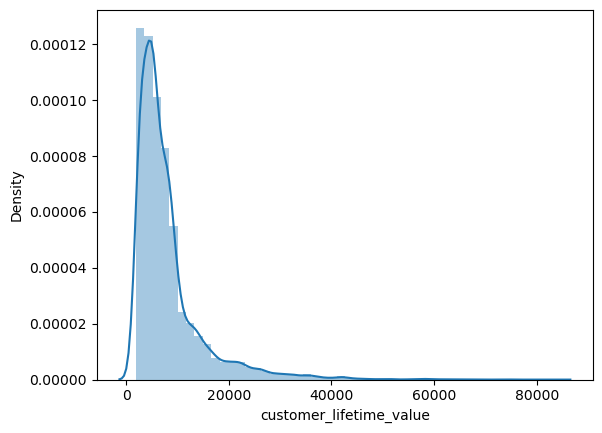

income


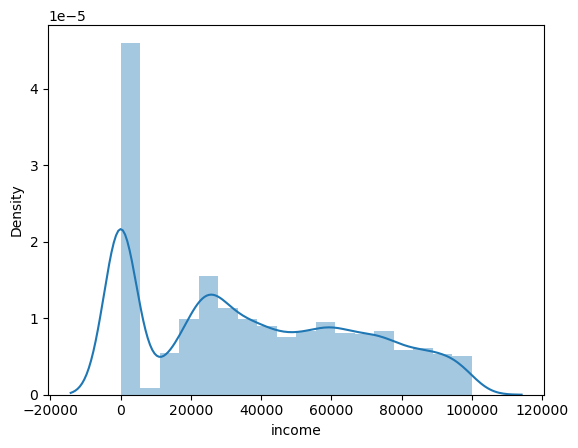

monthly_premium_auto


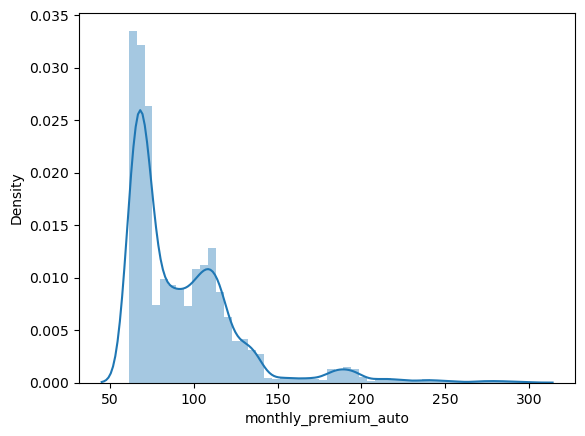

months_since_last_claim


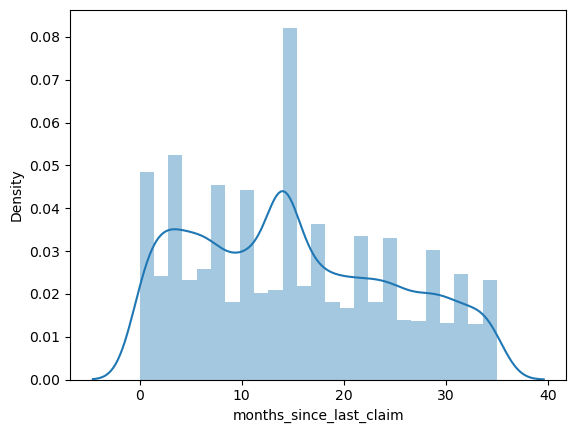

months_since_policy_inception


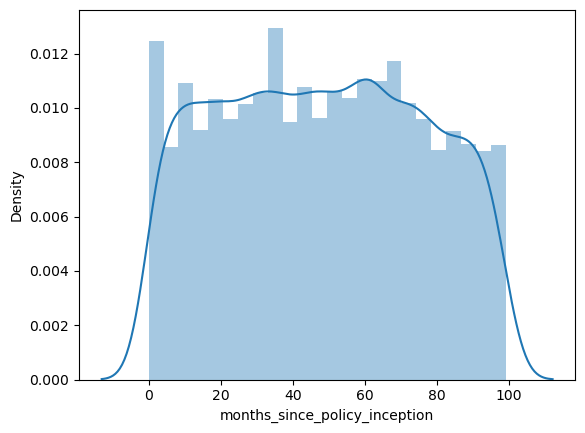

number_of_open_complaints


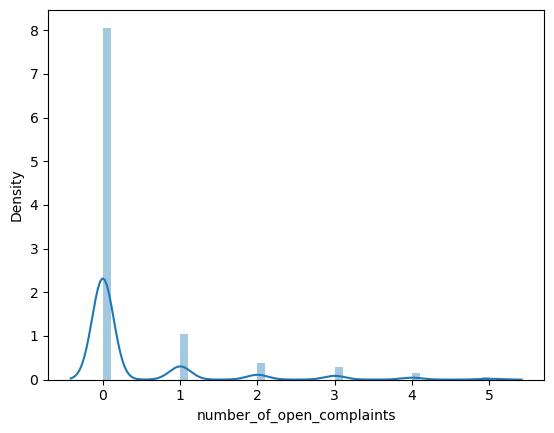

number_of_policies


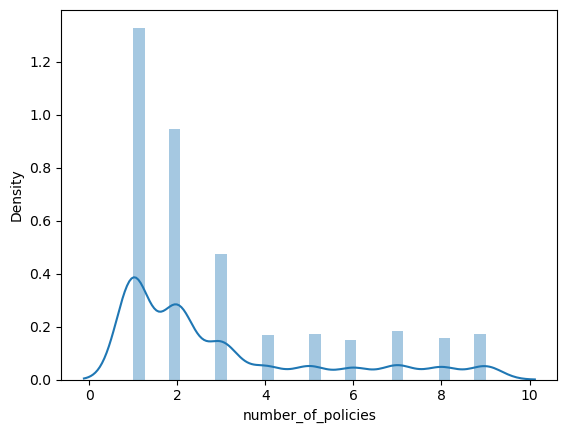

total_claim_amount


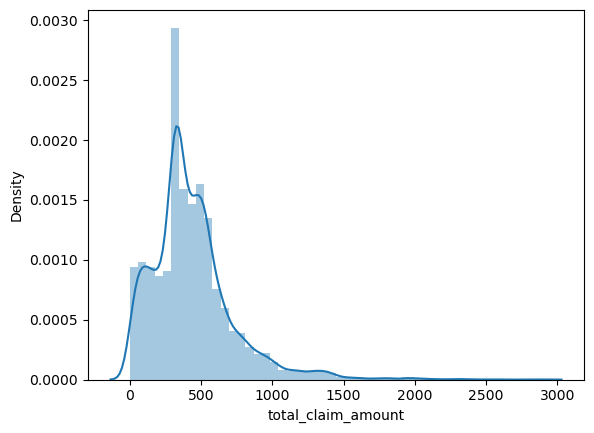

In [21]:
#Now we will try to check the normality of the numerical variables visually

for i in numerical.columns:
    print(i)
    sns.distplot(numerical[i])
    plt.show()

In [22]:
#checking multicollinearity

#Eventhough there is high correlation between "monthly_premium_auto" and "total_claim_amount", 
#"customer_lifetime_value" and "monthly_premium_auto" and a little of negative correlation between
#"income" y "total_claim_amount" i dont find multicollinearity

correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960,-0.354141
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505,0.631799
months_since_last_claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807,0.012340
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123,0.003095
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681,-0.012380
number_of_policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000,-0.008923
total_claim_amount,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.012380,-0.008923,1.000000


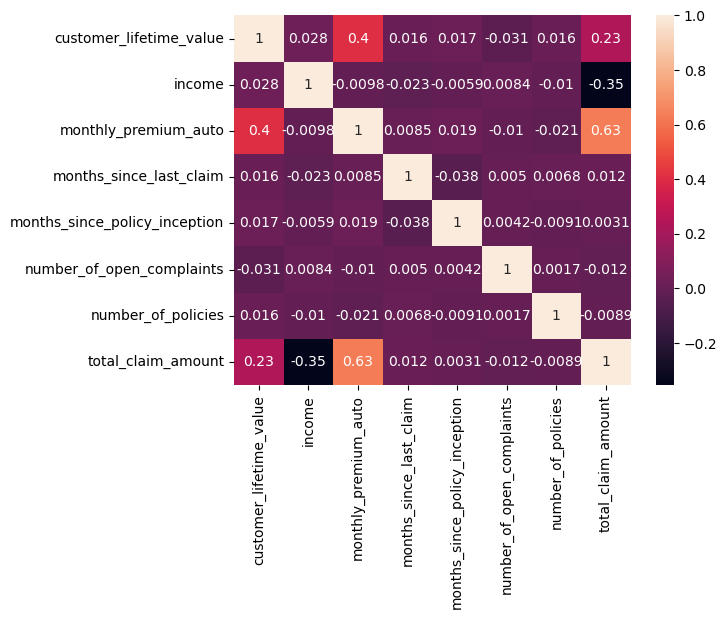

In [23]:
#Showing the heatmap 

sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Lab 5

In [24]:
# Separatting the data for training the model

X = numerical.drop(columns=["total_claim_amount"], axis=1)
y = numerical["total_claim_amount"]

In [25]:
# train_test_splitting: 75% of the features to train, 25% to test

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=33)

In [26]:
#creating an object for the scaler to normalize the data and fitting it to the training data

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [27]:
#once fitted to the training data, we apply it to the same data and to the test object

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Lab 6

In [28]:
#Lets drop the columns that we dont need from the categorical data before we encode it

categorical = categorical.drop(["effective_to_date", "customer", "months"], axis=1)
categorical


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [29]:
#Now i will check the unique values for each column

for i in categorical.columns:
    print(categorical[i].unique())

['Arizona' 'California' 'Washington' 'Oregon' 'other' 'Nevada']
['No' 'Yes' 'other']
['Basic' 'Extended' 'Premium']
['College' 'Bachelor' 'High School or Below' 'Doctor' 'Master']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['M' 'F']
['Suburban' 'Urban' 'Rural']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Personal L2' 'Corporate L2' 'Personal L1'
 'Special L1' 'Corporate L1' 'Special L3' 'Special L2']
['Offer3' 'Offer4' 'Offer2' 'Offer1']
['Agent' 'Call Center' 'Branch' 'Web']
['Four-Door Car' 'SUV' 'Two-Door Car' 'Sports Car' 'Luxury Car'
 'Luxury SUV' 'other']
['Medsize' 'Small' 'Large' 'other']


In [30]:
#Setting the encoder

encoder = OneHotEncoder(drop="first")

#Fitting it 

encoder.fit(categorical)


OneHotEncoder(drop='first')

In [31]:
#Now lets encode the categorical data and visualize like a matrix

matrix = encoder.transform(categorical).todense()
matrix

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])

In [32]:
#Here we can see all the categories created in nparrays

encoder.categories_[:]

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington', 'other'],
       dtype=object),
 array(['No', 'Yes', 'other'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
      

In [33]:
#a list to rule them all

columns = []

for i in range(len(encoder.categories_[:])):
    columns += list(encoder.categories_[i])[1:]
print(columns)

['California', 'Nevada', 'Oregon', 'Washington', 'other', 'Yes', 'other', 'Extended', 'Premium', 'College', 'Doctor', 'High School or Below', 'Master', 'Employed', 'Medical Leave', 'Retired', 'Unemployed', 'M', 'Suburban', 'Urban', 'Married', 'Single', 'Personal Auto', 'Special Auto', 'Corporate L2', 'Corporate L3', 'Personal L1', 'Personal L2', 'Personal L3', 'Special L1', 'Special L2', 'Special L3', 'Offer2', 'Offer3', 'Offer4', 'Branch', 'Call Center', 'Web', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car', 'Two-Door Car', 'other', 'Medsize', 'Small', 'other']


In [34]:
#creating the new categrorical dataframe 

cat_df = pd.DataFrame(matrix, columns=columns)
cat_df


,California,Nevada,Oregon,Washington,other,Yes,other,Extended,Premium,College,...,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,other,Medsize,Small,other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
#concatenating numerical and new categorical dfs

final_df = pd.concat((cat_df, numerical), axis=1)
final_df

,California,Nevada,Oregon,Washington,other,Yes,other,Extended,Premium,College,...,Small,other,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,9025.067525,23675,117,14.0,31,0.0,7,707.925645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,15563.369440,0,253,14.0,40,0.0,7,1214.400000
10906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,11971.977650,64195,158,0.0,27,4.0,6,618.288849


<Axes: >

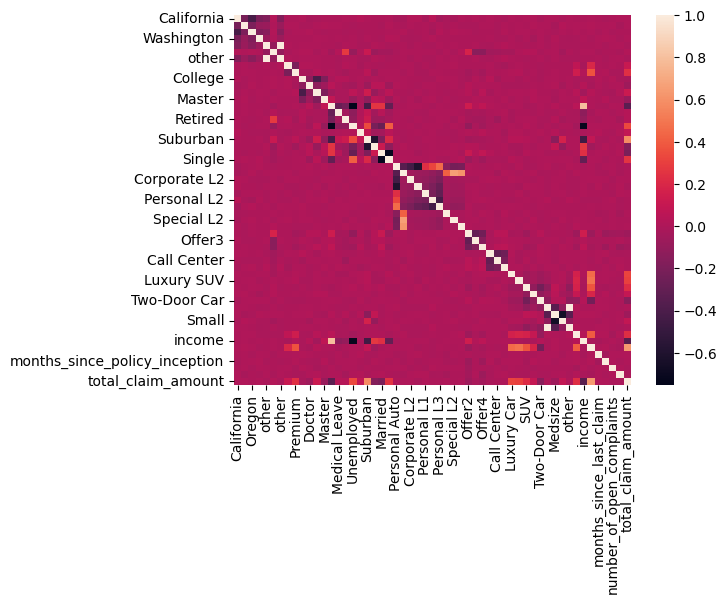

In [36]:
#checking correlations and multicolinearity again 

final_corr_matrix = final_df.corr()
final_corr_matrix

sns.heatmap(final_corr_matrix)

In [37]:
#checking multicollinearity 

final_corr_matrix["total_claim_amount"].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.631799
Suburban                         0.576226
Unemployed                       0.332941
Luxury Car                       0.317038
Luxury SUV                       0.308382
Single                           0.260264
Premium                          0.234643
customer_lifetime_value          0.232626
SUV                              0.223150
High School or Below             0.118444
Extended                         0.104656
Sports Car                       0.096235
Small                            0.083733
M                                0.080474
Retired                          0.034417
Medical Leave                    0.029223
Yes                              0.016416
California                       0.013196
months_since_last_claim          0.012340
Personal L1                      0.009579
Nevada                           0.009026
Washington                       0.008727
Special L1                       0

In [38]:
#Since i added new data, im going to need to train_test_split and fit the model again

X = final_df.drop(columns="total_claim_amount", axis=1)
y = final_df["total_claim_amount"]

display(X,y)

,California,Nevada,Oregon,Washington,other,Yes,other,Extended,Premium,College,...,Medsize,Small,other,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,4809.216960,48029,61,7.0,52,0.0,9
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,2228.525238,0,64,3.0,26,0.0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,14947.917300,22139,100,34.0,31,0.0,2
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,22332.439460,49078,97,10.0,3,0.0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,9025.067525,23675,117,14.0,31,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,15563.369440,0,253,14.0,40,0.0,7
10906,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,5259.444853,61146,65,7.0,68,0.0,6
10907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,23893.304100,39837,201,11.0,63,0.0,2
10908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,11971.977650,64195,158,0.0,27,4.0,6


0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: total_claim_amount, Length: 10910, dtype: float64

In [39]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=33)


In [40]:
#normalizing 

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [41]:
#transforming data

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [42]:
#Starting the linear regression model and fitting it to the training set

linear_regression = LinearRegression()

linear_regression.fit(scaled_X_train,y_train)


LinearRegression()

In [43]:
#Getting predictions

predictions = linear_regression.predict(scaled_X_test)
list(predictions)

[352.09727479699563,
 562.9188437379952,
 517.9357926907949,
 544.7118257957973,
 465.64980941606797,
 557.8312598020613,
 -9.813564150592185,
 457.8229910585558,
 532.2084302346884,
 637.2004481467131,
 63.627695310825345,
 329.91911089554077,
 193.94213798329898,
 609.1256355763988,
 511.48595859760815,
 417.51403189384655,
 491.72070293052445,
 232.285897351174,
 293.6147175726537,
 338.68781152550406,
 660.7832651545724,
 375.42382643605526,
 695.6436853415673,
 574.6966444840941,
 438.3035744295285,
 583.292345604686,
 172.66026333717735,
 208.13421400048256,
 696.2603309571427,
 654.4036881194005,
 620.897572381266,
 568.0372803115251,
 421.202033850532,
 426.2166855420027,
 196.13222270690756,
 206.5552178012664,
 625.7380533966236,
 394.5446670233236,
 443.90791140507633,
 218.26630066193445,
 526.5951101011264,
 628.5349223389841,
 541.9355896159128,
 356.2807833082259,
 90.77836519350473,
 317.14514811119136,
 846.0528859558455,
 210.09423249971158,
 84.26632827559973,
 339.7

In [44]:
#Now lets calculate the metrics

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared= False)
mae = mean_absolute_error(y_test, predictions)
r2 = round(r2_score(y_test, predictions), 2)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2 score: ", r2)

mse:  17428.65050489697
rmse:  132.01761437360156
mae:  93.16674154574262
r2 score:  0.78


# Lab 7

<Axes: >

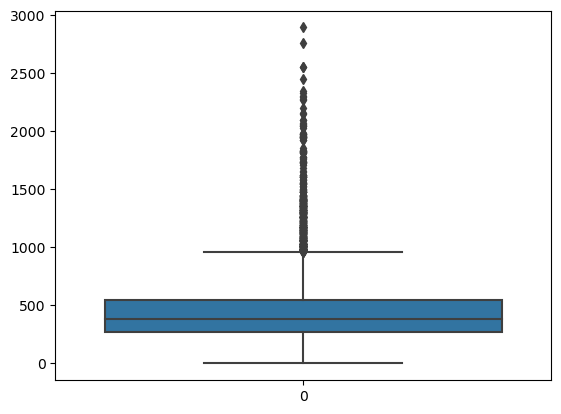

In [67]:
#To improve the model im going to check the outliers in the target variable

sns.boxplot(numerical["total_claim_amount"])

In [46]:
#Lets remove outliers by filtering the final_df with them

tca_IQR = abs(np.quantile(numerical["total_claim_amount"], .25) - np.quantile(numerical["total_claim_amount"], .75)) * 1.5
lower_boundary = np.quantile(numerical["total_claim_amount"], .25) - tca_IQR
upper_boundary = np.quantile(numerical["total_claim_amount"], .75) + tca_IQR

lower_boundary, upper_boundary

(-143.09368312500004, 961.3762098750001)

In [64]:
final_df = final_df[(final_df["total_claim_amount"] > -143.09368312500004) & (final_df["total_claim_amount"] < 961.3762098750001)].sort_values("total_claim_amount")
final_df

,California,Nevada,Oregon,Washington,other,Yes,other,Extended,Premium,College,...,Small,other,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
3663,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5004.135361,86834,64,2.0,93,0.0,8,0.099007
4091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4538.847818,82297,116,5.0,62,0.0,1,0.382107
2778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4538.847818,82297,116,14.0,62,0.0,1,0.382107
6197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,6186.497831,88375,77,23.0,11,0.0,3,0.423310
6972,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,6186.497831,88375,77,23.0,11,0.0,3,0.423310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3123.080994,0,101,1.0,83,4.0,1,960.115399
4676,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3123.080994,0,101,1.0,83,4.0,1,960.115399
7492,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3123.080994,0,101,1.0,83,4.0,1,960.115399
3338,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3123.080994,0,101,1.0,83,4.0,1,960.115399


In [68]:
#Doing the train_test_split again

X = final_df.drop(columns="total_claim_amount", axis=1)
y = final_df["total_claim_amount"]

display(X,y)

,California,Nevada,Oregon,Washington,other,Yes,other,Extended,Premium,College,...,Medsize,Small,other,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
3663,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,5004.135361,86834,64,2.0,93,0.0,8
4091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,4538.847818,82297,116,5.0,62,0.0,1
2778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,4538.847818,82297,116,14.0,62,0.0,1
6197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,6186.497831,88375,77,23.0,11,0.0,3
6972,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,6186.497831,88375,77,23.0,11,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3123.080994,0,101,1.0,83,4.0,1
4676,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3123.080994,0,101,1.0,83,4.0,1
7492,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3123.080994,0,101,1.0,83,4.0,1
3338,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3123.080994,0,101,1.0,83,4.0,1


3663      0.099007
4091      0.382107
2778      0.382107
6197      0.423310
6972      0.423310
           ...    
8377    960.115399
4676    960.115399
7492    960.115399
3338    960.115399
3558    960.115399
Name: total_claim_amount, Length: 10354, dtype: float64

In [70]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=33)

In [71]:
#normalizing 

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [72]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [73]:
#Starting the linear regression model and fitting it to the training set

linear_regression = LinearRegression()

linear_regression.fit(scaled_X_train,y_train)

LinearRegression()

In [74]:
predictions = linear_regression.predict(scaled_X_test)
list(predictions)

[393.6015605232443,
 479.848096969651,
 646.3936997823375,
 405.4947802564499,
 505.79795670025965,
 385.045970872485,
 393.0864352430902,
 597.1636572906884,
 410.0335996368321,
 226.6148040728821,
 25.41029946333441,
 379.53313437795987,
 68.00643801008056,
 356.4120093400114,
 6.188889849961811,
 580.2795582640431,
 565.4426948714388,
 54.315774425633265,
 379.418976495234,
 467.57129922603553,
 663.8833633226125,
 580.5782553645158,
 277.1780420419551,
 688.4054345255163,
 522.0419590142151,
 408.34755335104427,
 365.6422667400772,
 797.1260099843914,
 210.11701163605443,
 387.6759652918186,
 374.39789423080293,
 393.1186234834381,
 605.2255563375497,
 312.2422336740208,
 647.9796316640418,
 387.94449626778965,
 510.0900304960582,
 414.9501475564197,
 567.4503091714832,
 471.6291142121976,
 335.47956170300654,
 398.41605992125164,
 11.66861212924664,
 509.1500647587129,
 557.1588805887174,
 507.41219846529293,
 57.7406907963948,
 373.2160523082996,
 380.3072982246788,
 41.666122585

In [75]:
#Now lets calculate the metrics
#IMPROVED IT!

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared= False)
mae = mean_absolute_error(y_test, predictions)
r2 = round(r2_score(y_test, predictions), 2)

print("mse: ", mse)
print("rmse: ", rmse)
print("mae: ", mae)
print("r2 score: ", r2)

mse:  9400.986877587298
rmse:  96.95868644730754
mae:  74.37929611890068
r2 score:  0.79
